In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Indian_Kids_Screen_Time.csv")
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [4]:
df.shape

(9712, 8)

In [5]:
df.columns

Index(['Age', 'Gender', 'Avg_Daily_Screen_Time_hr', 'Primary_Device',
       'Exceeded_Recommended_Limit', 'Educational_to_Recreational_Ratio',
       'Health_Impacts', 'Urban_or_Rural'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [7]:
df= df.fillna('No')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     9712 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [8]:
df.describe(include ='object')

,Gender,Primary_Device,Health_Impacts,Urban_or_Rural
count,9712,9712,9712,9712
unique,2,4,16,2
top,Male,Smartphone,No,Urban
freq,4942,4568,3218,6851


In [9]:
df['Gender'].value_counts()

Gender
Male      4942
Female    4770
Name: count, dtype: int64

In [10]:
df['Primary_Device'].value_counts()

Primary_Device
Smartphone    4568
TV            2487
Laptop        1433
Tablet        1224
Name: count, dtype: int64

In [11]:
df['Exceeded_Recommended_Limit'].value_counts()

Exceeded_Recommended_Limit
True     8301
False    1411
Name: count, dtype: int64

In [12]:
df['Urban_or_Rural'].value_counts()

Urban_or_Rural
Urban    6851
Rural    2861
Name: count, dtype: int64

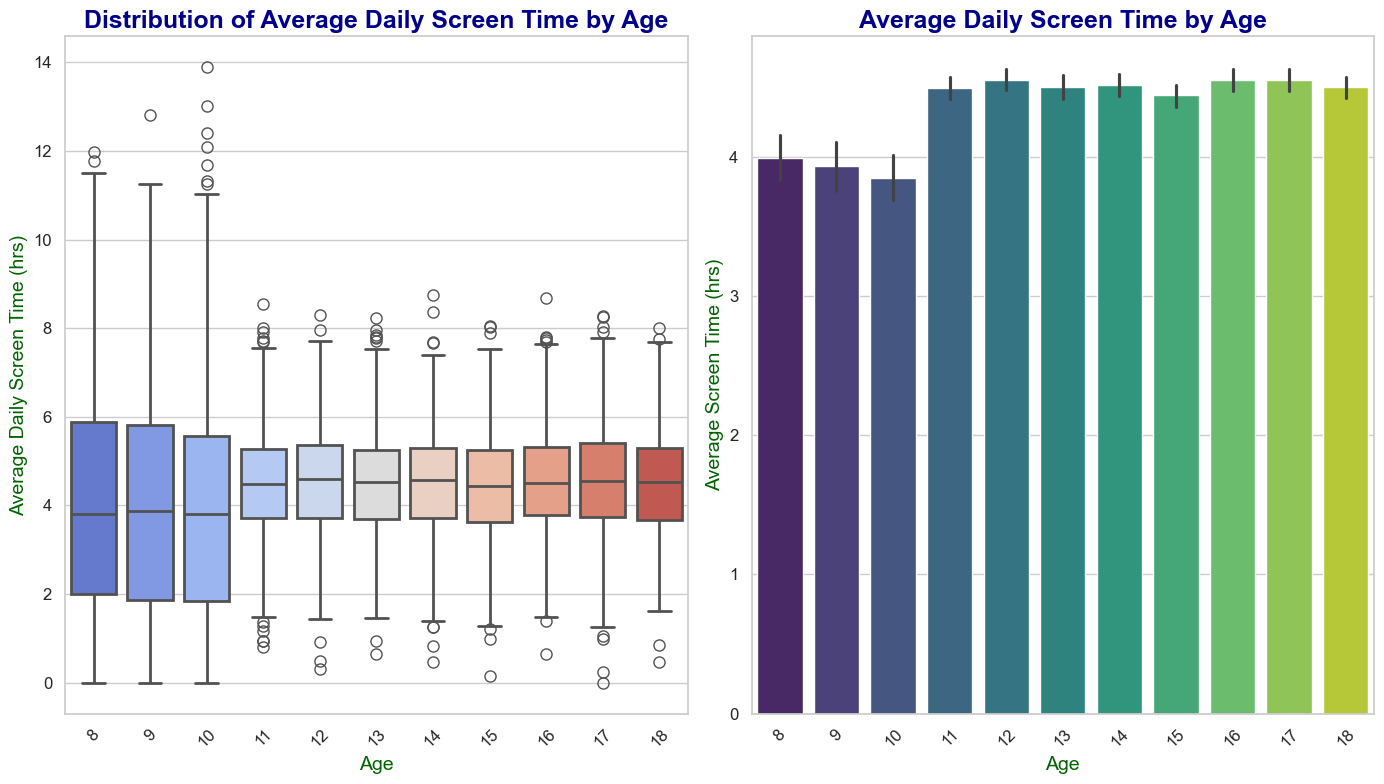

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12, 8)
fig, axes = plt.subplots(1, 2, figsize=(14, 8)) 
sns.boxplot(data=df, x='Age', y='Avg_Daily_Screen_Time_hr', palette='coolwarm', fliersize=8, linewidth=2, ax=axes[0])
axes[0].set_title('Distribution of Average Daily Screen Time by Age', fontsize=18, fontweight='bold', color='darkblue')
axes[0].set_xlabel('Age', fontsize=14, color='darkgreen')
axes[0].set_ylabel('Average Daily Screen Time (hrs)', fontsize=14, color='darkgreen')
axes[0].tick_params(axis='both', which='major', labelsize=12)
axes[0].tick_params(axis='x', rotation=45)


sns.barplot(x='Age', y='Avg_Daily_Screen_Time_hr', data=df, palette='viridis', ax=axes[1])

axes[1].set_title('Average Daily Screen Time by Age', fontsize=18, fontweight='bold', color='darkblue')
axes[1].set_xlabel('Age', fontsize=14, color='darkgreen')
axes[1].set_ylabel('Average Screen Time (hrs)', fontsize=14, color='darkgreen')
axes[1].tick_params(axis='both', which='major', labelsize=12)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.savefig("combined_plots.png", dpi=300, bbox_inches='tight')

plt.show()
plt.close()


In [13]:
g_type= df['Gender'].value_counts()
gender_type= pd.DataFrame(g_type) 
gender_type.reset_index(inplace=True)
p_device= df['Primary_Device'].value_counts() 
primary_device= pd.DataFrame(p_device) 
primary_device.reset_index(inplace=True)
e_limit = df['Exceeded_Recommended_Limit'].value_counts()
exceeded_limit= pd.DataFrame(e_limit) 
exceeded_limit.reset_index(inplace=True)
u_r = df['Urban_or_Rural'].value_counts()
urban_rural= pd.DataFrame(u_r) 
urban_rural.reset_index(inplace=True)

In [14]:
gender_colors=['#FC8D59', '#FDCC8A']
device_colors=['#238B45', '#66C266', '#9BDB96', '#D4F0D1']
tf_colors= ['#C51B7D', '#F1B6DA']
ft_colors= ['#F1B6DA', '#C51B7D']
ur_colors= ['#008B8B', '#B0E0E6'] 
impact_colors= ['#6A51A3', '#9E9AC8', '#BCBDDC', '#DADAEB', '#F2F0F7']
age_colors = ['#08519C', '#3182BD', '#6BAED6', '#C6DBEF']

genderlabels=['Male','Female']
phonelabels = ['Smartphone','TV','Laptop','Tablet']
limitlabels = ['Exceeded Limits','Within Limits']
urlabels = ['Urban','Rural']
himpacts = ['Poor Sleep','No','Eye Strain','Anxiety','Obesity Risk']

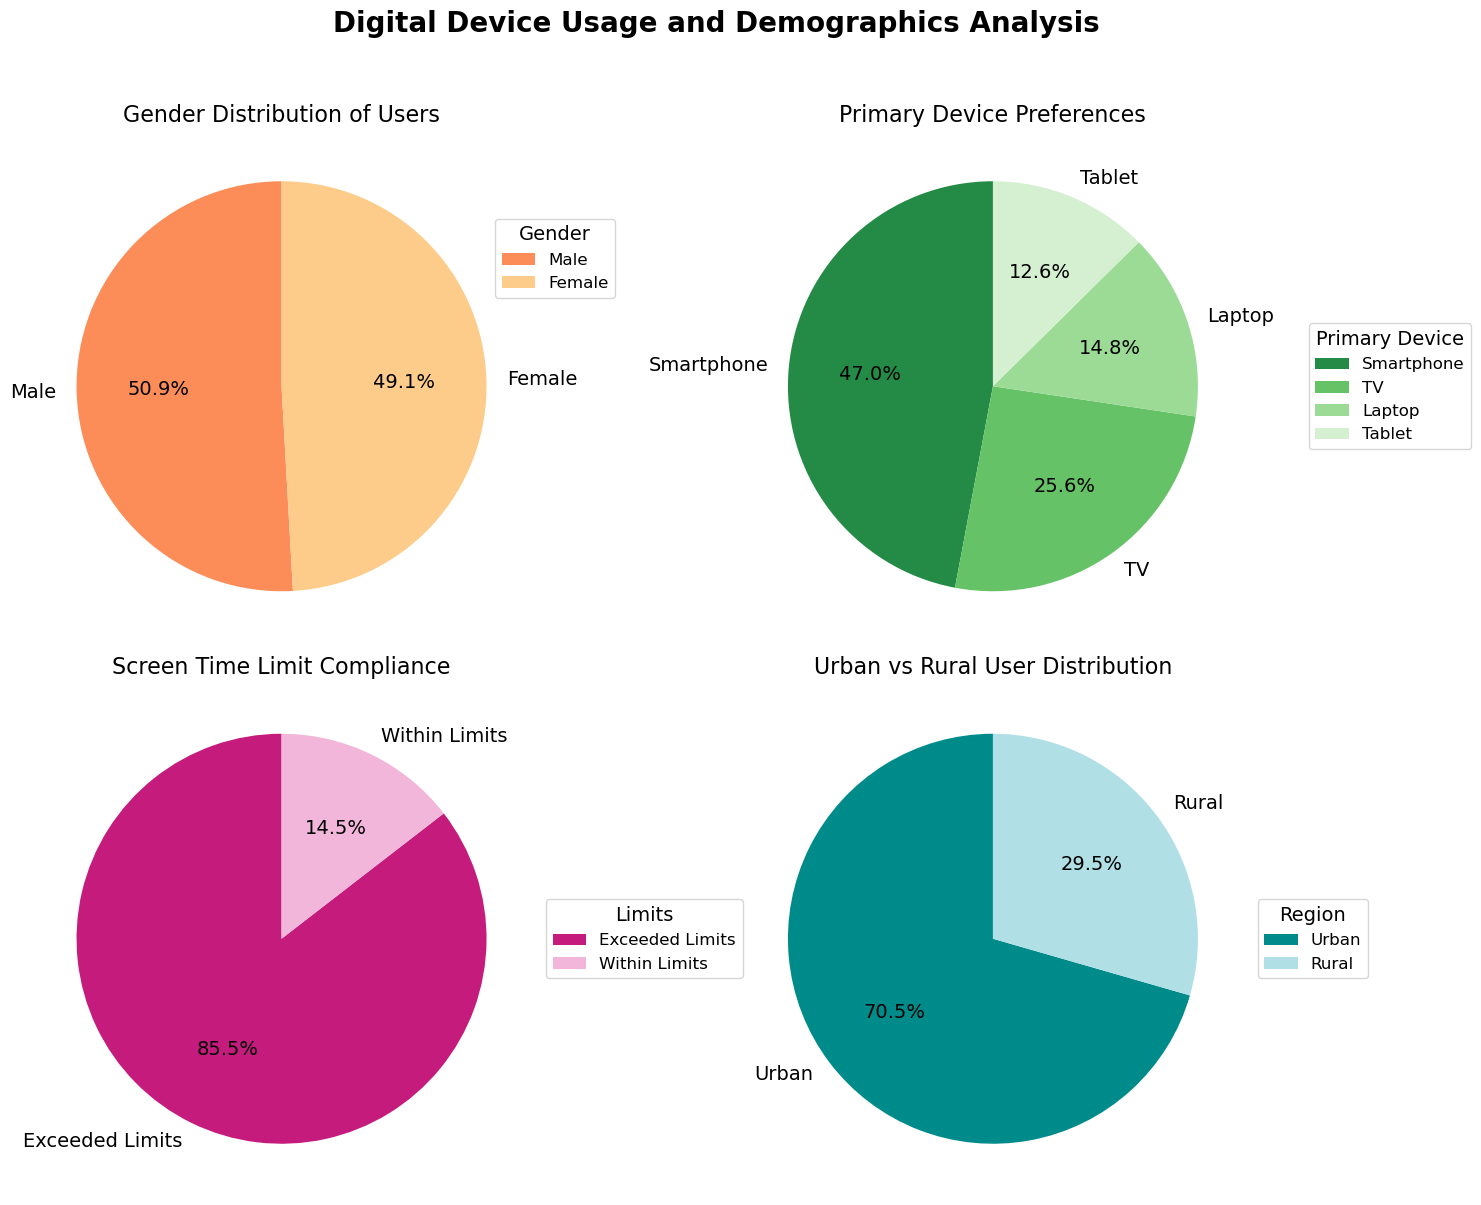

In [52]:
import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

ax1.pie(gender_type['count'], labels=genderlabels, autopct='%1.1f%%', startangle=90, colors=gender_colors, textprops={'fontsize': 14}, center=(0,0), radius=1) 
ax1.legend(genderlabels, title='Gender', loc='center left', bbox_to_anchor=(0.9, 0.75), title_fontsize=14, fontsize=12) 
ax1.set_title('Gender Distribution of Users', fontsize=16)

ax2.pie(primary_device['count'], labels=phonelabels, autopct='%1.1f%%', startangle=90, colors=device_colors, textprops={'fontsize': 14}, center=(0,0), radius=1)  
ax2.legend(phonelabels, title='Primary Device', loc='center left', bbox_to_anchor=(1.1, 0.5), title_fontsize=14, fontsize=12) 
ax2.set_title('Primary Device Preferences', fontsize=16)

ax3.pie(exceeded_limit['count'], labels=limitlabels, autopct='%1.1f%%', startangle=90, colors=tf_colors, textprops={'fontsize': 14}, center=(0,0), radius=1) 
ax3.legend(limitlabels, title='Limits', loc='center left', bbox_to_anchor=(1, 0.5), title_fontsize=14, fontsize=12) 
ax3.set_title('Screen Time Limit Compliance', fontsize=16)

ax4.pie(urban_rural['count'], labels=urlabels, autopct='%1.1f%%', startangle=90, colors=ur_colors, textprops={'fontsize': 14}, center=(0,0), radius=1) 
ax4.legend(urlabels, title='Region', loc='center left', bbox_to_anchor=(1, 0.5), title_fontsize=14, fontsize=12) 
ax4.set_title('Urban vs Rural User Distribution', fontsize=16)

fig.suptitle('Digital Device Usage and Demographics Analysis', fontsize=20, fontweight='bold', y=1)

plt.tight_layout()
plt.subplots_adjust(top=0.90)

plt.savefig("digital_device_usage_analysis.png", dpi=300, bbox_inches='tight')
plt.show()


In [16]:
df.describe()

,Age,Avg_Daily_Screen_Time_hr,Educational_to_Recreational_Ratio
count,9712.000000,9712.000000,9712.000000
mean,12.979201,4.352837,0.427226
std,3.162437,1.718232,0.073221
min,8.000000,0.000000,0.300000
25%,10.000000,3.410000,0.370000
50%,13.000000,4.440000,0.430000
75%,16.000000,5.380000,0.480000
max,18.000000,13.890000,0.600000


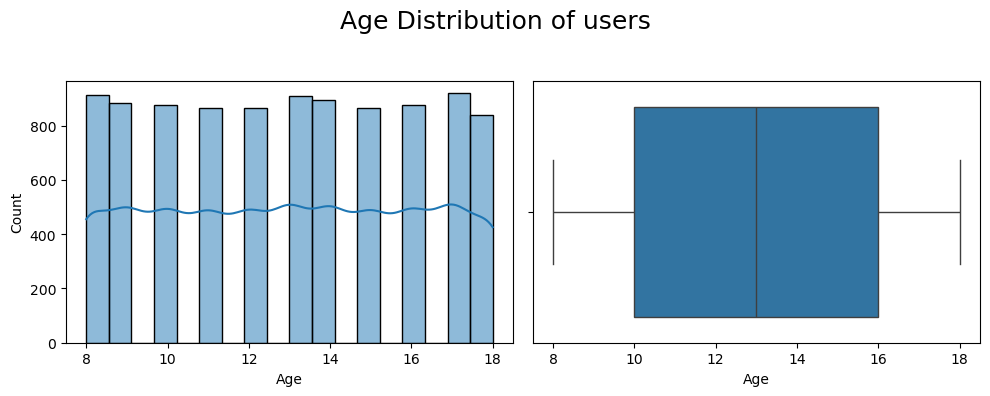

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.histplot(data=df, x='Age', kde=True, ax=axes[0])
sns.boxplot(data=df, x='Age',  ax=axes[1])
fig.suptitle('Age Distribution of users', fontsize=18)
plt.tight_layout()
plt.subplots_adjust(top=0.80)
plt.show()

In [18]:
df['Age'].value_counts()

Age
17    919
8     912
13    910
14    896
9     885
10    877
16    876
12    867
11    866
15    864
18    840
Name: count, dtype: int64

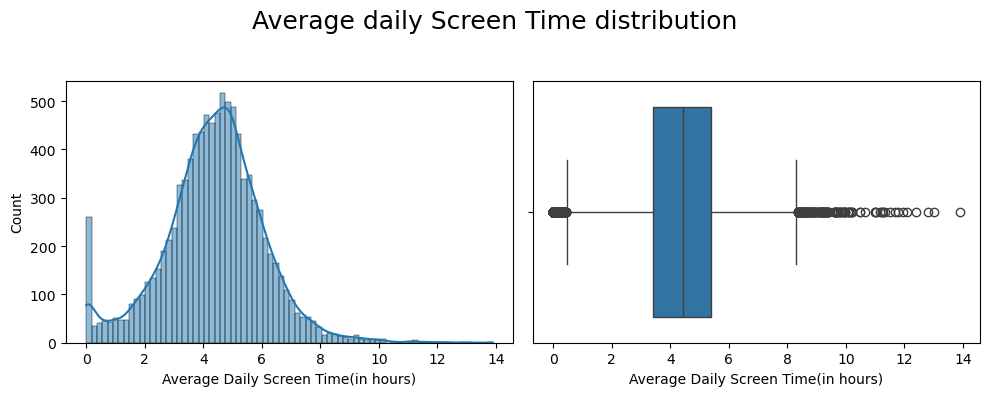

In [19]:
fig, axe = plt.subplots(1, 2, figsize=(10,4))
sns.histplot(data=df, x='Avg_Daily_Screen_Time_hr', kde=True, ax=axe[0])
axe[0].set_xlabel('Average Daily Screen Time(in hours)')
sns.boxplot(data=df, x='Avg_Daily_Screen_Time_hr',  ax=axe[1])
axe[1].set_xlabel('Average Daily Screen Time(in hours)')
fig.suptitle('Average daily Screen Time distribution', fontsize=18)
plt.tight_layout()
plt.subplots_adjust(top=0.8)
plt.show()

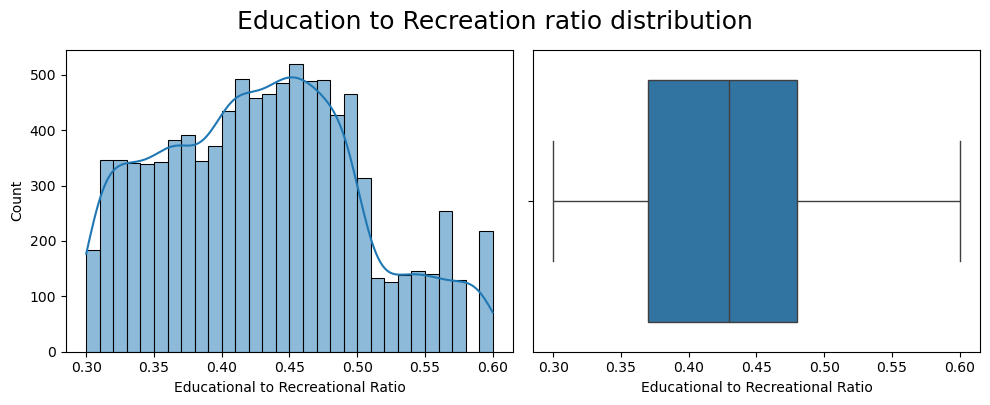

In [20]:
fig, axe = plt.subplots(1, 2, figsize=(10,4))
sns.histplot(data=df, x='Educational_to_Recreational_Ratio', kde=True, ax=axe[0])
axe[0].set_xlabel('Educational to Recreational Ratio')
sns.boxplot(data=df, x='Educational_to_Recreational_Ratio',  ax=axe[1])
axe[1].set_xlabel('Educational to Recreational Ratio')
fig.suptitle('Education to Recreation ratio distribution', fontsize=18, y=1)
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

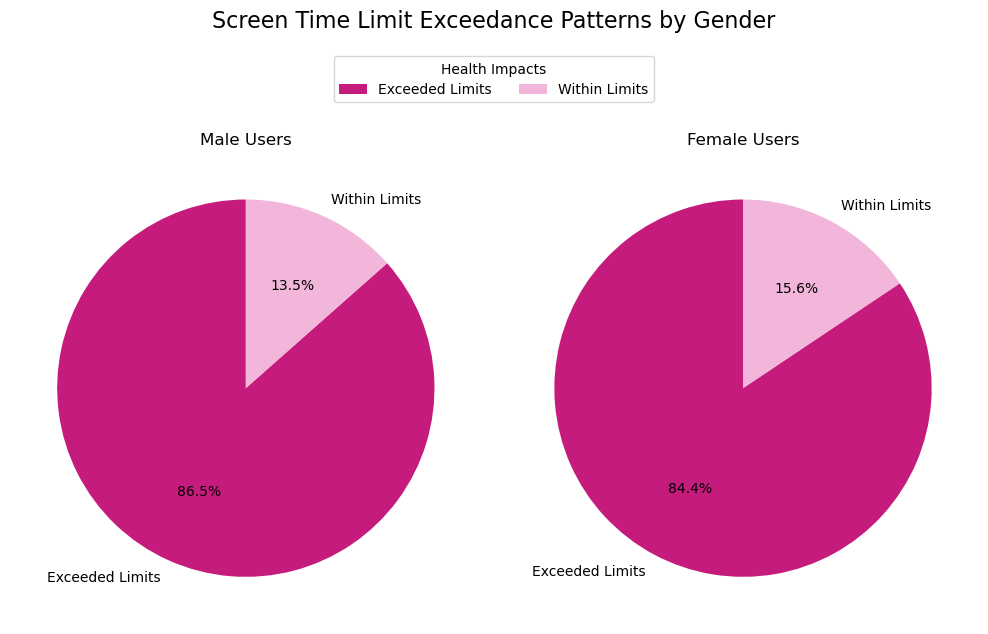

In [21]:
g_limit=pd.crosstab(index=df['Exceeded_Recommended_Limit'], columns=df['Gender'] )
g_limit_reset= g_limit.reset_index()
gender_limit = g_limit_reset.melt(id_vars='Exceeded_Recommended_Limit',
                                 value_vars=['Female','Male'],
                                 var_name='Gender',
                                 value_name='Counts')
gender_limit_male = gender_limit[gender_limit['Gender']=='Male'].sort_values(['Counts'], ascending=False)
gender_limit_female = gender_limit[gender_limit['Gender']=='Female'].sort_values(['Counts'], ascending=False)
truefalse_colors=['#5a5a5a', '#e74c3c']
mylabels=['Within Limits', 'Exceeded Limits']
fig,axe = plt.subplots(1,2,figsize=(10,8))
axe[0].pie(gender_limit_male['Counts'] , autopct='%1.1f%%', labels=limitlabels, startangle=90, colors=tf_colors)
axe[0].set_title('Male Users')
axe[1].pie(gender_limit_female['Counts'] ,autopct='%1.1f%%', labels=limitlabels, startangle=90, colors=tf_colors)
axe[1].set_title('Female Users')
plt.suptitle('Screen Time Limit Exceedance Patterns by Gender', fontsize=16, y=0.95)
fig.legend(limitlabels, 
          title='Health Impacts',
          loc='upper center', 
          bbox_to_anchor=(0.5, 0.9),
          ncol=5)
plt.tight_layout()
plt.show()

In [22]:
device_limit = pd.crosstab(columns=df['Exceeded_Recommended_Limit'], index=df['Primary_Device'])
device_limit

Exceeded_Recommended_Limit,False,True
Primary_Device,,
Laptop,158,1275
Smartphone,619,3949
TV,402,2085
Tablet,232,992


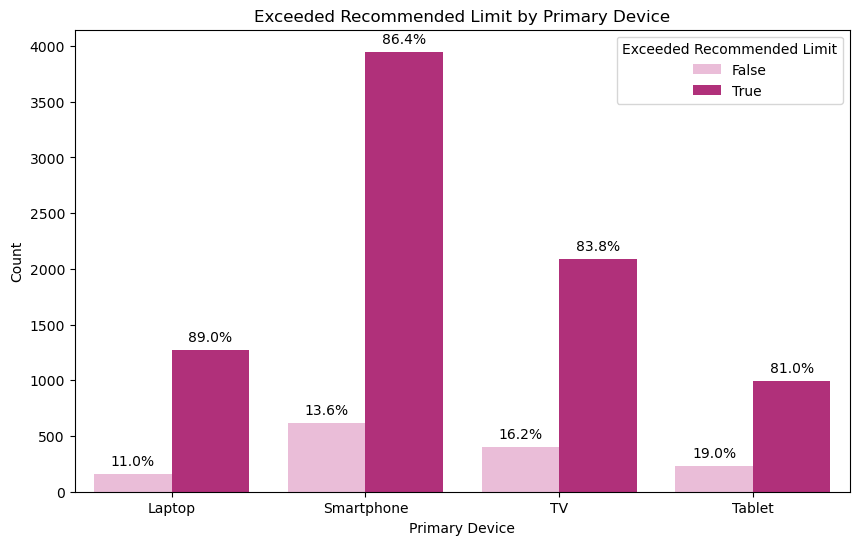

In [23]:
device_limit_reset=device_limit.reset_index()
device_limit_melt = device_limit_reset.melt(id_vars='Primary_Device', 
                                          value_vars=[True, False],
                                          var_name='Exceeded_Recommended_Limit',
                                          value_name='Counts')
plt.figure(figsize=(10,6))
sns.barplot(data=device_limit_melt, x='Primary_Device', y='Counts', hue='Exceeded_Recommended_Limit', width=0.8, palette=ft_colors)
devices = ['Laptop', 'Smartphone', 'TV', 'Tablet']
false_counts = [158, 619, 402, 232]
true_counts = [1275, 3949, 2085, 992]

for i, device in enumerate(devices):
    total = false_counts[i] + true_counts[i]
    false_percentage = (false_counts[i] / total) * 100
    true_percentage = (true_counts[i] / total) * 100
    
    # Add percentage text on False bars (left position)
    plt.text(i - 0.2, false_counts[i] + 50, 
             f'{false_percentage:.1f}%', 
             ha='center', va='bottom', fontsize=10)
    
    # Add percentage text on True bars (right position)
    plt.text(i + 0.2, true_counts[i] + 50, 
             f'{true_percentage:.1f}%', 
             ha='center', va='bottom', fontsize=10)
plt.title('Exceeded Recommended Limit by Primary Device')
plt.ylabel('Count')
plt.xlabel('Primary Device')
plt.legend(title='Exceeded Recommended Limit')
plt.show()

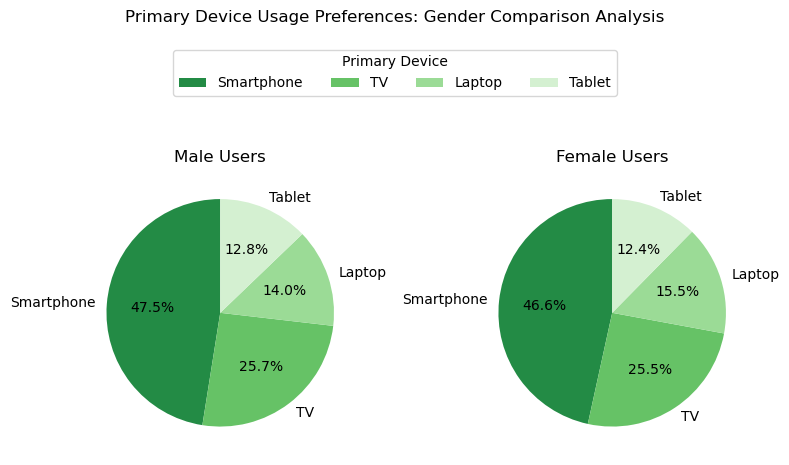

In [24]:
a = pd.crosstab(index=df['Primary_Device'], columns=df['Gender']).reset_index()
a.sort_values(['Female'], ascending=False, inplace=True)
ur_melt = a.melt(id_vars='Primary_Device',
                value_vars=['Female','Male'],
                var_name='Gender',
                value_name = 'Counts')
male_impact = ur_melt[ur_melt['Gender']=='Male']
female_impact = ur_melt[ur_melt['Gender']=='Female']
fig, axe = plt.subplots(1,2,figsize=(8,6))
axe[0].pie(male_impact['Counts'],labels=phonelabels,autopct='%1.1f%%',startangle=90, colors=device_colors)
axe[0].set_title("Male Users")
axe[1].pie(female_impact['Counts'],labels=phonelabels,autopct='%1.1f%%',startangle=90, colors=device_colors)
axe[1].set_title("Female Users")
plt.suptitle("Primary Device Usage Preferences: Gender Comparison Analysis")
fig.legend(title='Primary Device', labels=phonelabels,loc='upper center', 
          bbox_to_anchor=(0.5, 0.925),
          ncol=5)
plt.tight_layout()
plt.show()

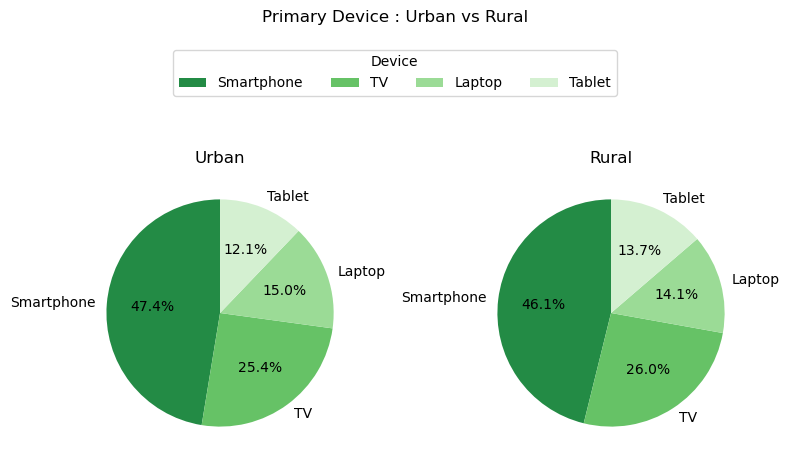

In [25]:
ur_device = pd.crosstab(columns=df['Urban_or_Rural'], index=df['Primary_Device']).reset_index()
ur_device=ur_device.sort_values('Urban', ascending=False)
ur_melt1 = ur_device.melt(id_vars='Primary_Device',
                          value_vars = ['Urban','Rural'],
                          var_name='Urban_or_Rural',
                          value_name = 'Counts')
rural_impact = ur_melt1[ur_melt1['Urban_or_Rural']=='Rural']
urban_impact = ur_melt1[ur_melt1['Urban_or_Rural']=='Urban']
fig, axe = plt.subplots(1,2,figsize=(8,6))
axe[0].pie(urban_impact['Counts'],labels=phonelabels,autopct='%1.1f%%',startangle=90, colors=device_colors)
axe[0].set_title("Urban")
axe[1].pie(rural_impact['Counts'],labels=phonelabels,autopct='%1.1f%%',startangle=90, colors=device_colors)
axe[1].set_title("Rural")
plt.suptitle("Primary Device : Urban vs Rural")
fig.legend(title='Device', labels=phonelabels,loc='upper center', 
          bbox_to_anchor=(0.5, 0.925),
          ncol=5)
plt.tight_layout()
plt.show()

In [26]:
df['Health_Impacts'].value_counts()

Health_Impacts
No                                               3218
Poor Sleep                                       2268
Poor Sleep, Eye Strain                            979
Eye Strain                                        644
Poor Sleep, Anxiety                               608
Poor Sleep, Obesity Risk                          452
Anxiety                                           385
Poor Sleep, Eye Strain, Anxiety                   258
Obesity Risk                                      252
Poor Sleep, Eye Strain, Obesity Risk              188
Eye Strain, Anxiety                               135
Eye Strain, Obesity Risk                          106
Poor Sleep, Anxiety, Obesity Risk                  78
Anxiety, Obesity Risk                              69
Poor Sleep, Eye Strain, Anxiety, Obesity Risk      37
Eye Strain, Anxiety, Obesity Risk                  35
Name: count, dtype: int64

In [27]:
health_impacts_split= df['Health_Impacts'].str.split(', ',expand=True)
health_impacts_stack = health_impacts_split.stack().reset_index()
health_impacts = df.merge(health_impacts_stack, left_index=True, right_on = 'level_0')
health_impacts.drop(columns = ['Avg_Daily_Screen_Time_hr','Educational_to_Recreational_Ratio','Health_Impacts','level_0','level_1'],inplace=True)
health_impacts.rename(columns = {0:'Health_Impacts'}, inplace=True)
health_impacts.head()

,Age,Gender,Primary_Device,Exceeded_Recommended_Limit,Urban_or_Rural,Health_Impacts
0,14,Male,Smartphone,True,Urban,Poor Sleep
1,14,Male,Smartphone,True,Urban,Eye Strain
2,11,Female,Laptop,True,Urban,Poor Sleep
3,18,Female,TV,True,Urban,Poor Sleep
4,15,Female,Laptop,False,Urban,No


In [28]:
limit_health_impact = pd.crosstab(columns=health_impacts['Exceeded_Recommended_Limit'],  index=health_impacts['Health_Impacts'] )
limit_health_impact

Exceeded_Recommended_Limit,False,True
Health_Impacts,,
Anxiety,0,1605
Eye Strain,0,2382
No,1411,1807
Obesity Risk,0,1217
Poor Sleep,0,4868


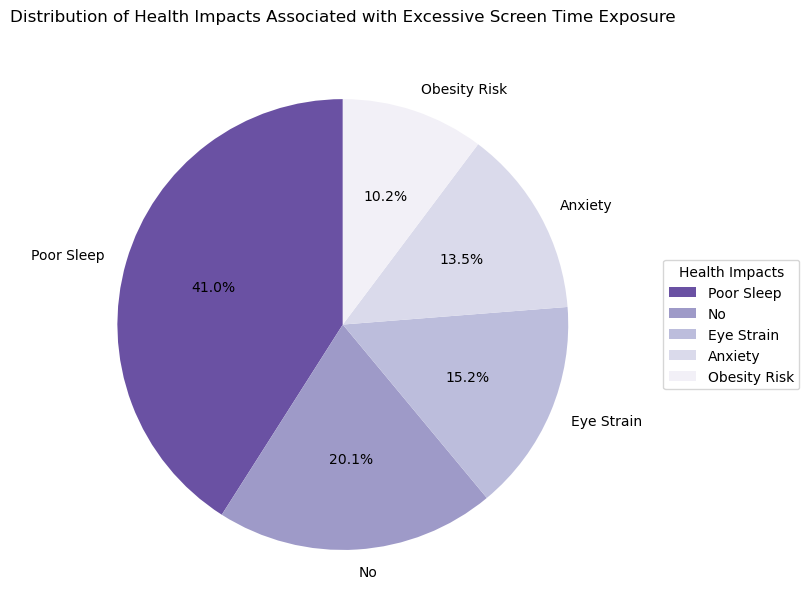

In [29]:
h_impact = health_impacts[health_impacts['Exceeded_Recommended_Limit']==True]
a = h_impact['Health_Impacts'].value_counts().reset_index()
plt.figure(figsize=(8,6))
plt.pie(a['count'], labels=himpacts, autopct='%1.1f%%',colors=impact_colors, startangle=90,center=(0,0), radius=0.7)
plt.axis('equal')
plt.legend(himpacts, 
          title='Health Impacts',
          loc='center left', 
          bbox_to_anchor=(1, 0.5))
plt.title('Distribution of Health Impacts Associated with Excessive Screen Time Exposure', pad=40)
plt.tight_layout()
plt.show()

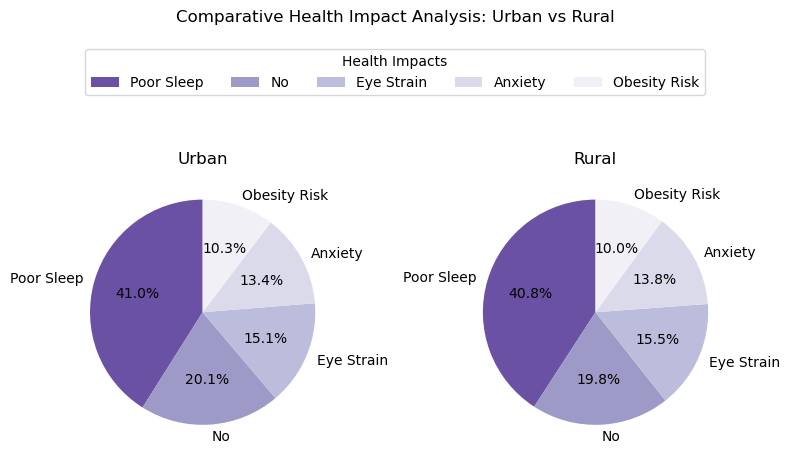

In [30]:
a = pd.crosstab(index=h_impact['Health_Impacts'], columns=h_impact['Urban_or_Rural']).reset_index()
a.sort_values(['Rural'], ascending=False, inplace=True)
ur_melt = a.melt(id_vars='Health_Impacts',
                value_vars=['Rural','Urban'],
                var_name='Urban_or_Rural',
                value_name = 'Counts')
rural_impact = ur_melt[ur_melt['Urban_or_Rural']=='Rural']
urban_impact = ur_melt[ur_melt['Urban_or_Rural']=='Urban']
fig, axe = plt.subplots(1,2,figsize=(8,6))
axe[0].pie(urban_impact['Counts'],labels=himpacts,autopct='%1.1f%%',startangle=90, colors=impact_colors)
axe[0].set_title("Urban")
axe[1].pie(rural_impact['Counts'],labels=himpacts,autopct='%1.1f%%',startangle=90, colors=impact_colors)
axe[1].set_title("Rural")
plt.suptitle("Comparative Health Impact Analysis: Urban vs Rural")
fig.legend(title='Health Impacts', labels=himpacts,loc='upper center', 
          bbox_to_anchor=(0.5, 0.925),
          ncol=5)
plt.tight_layout()
plt.show()

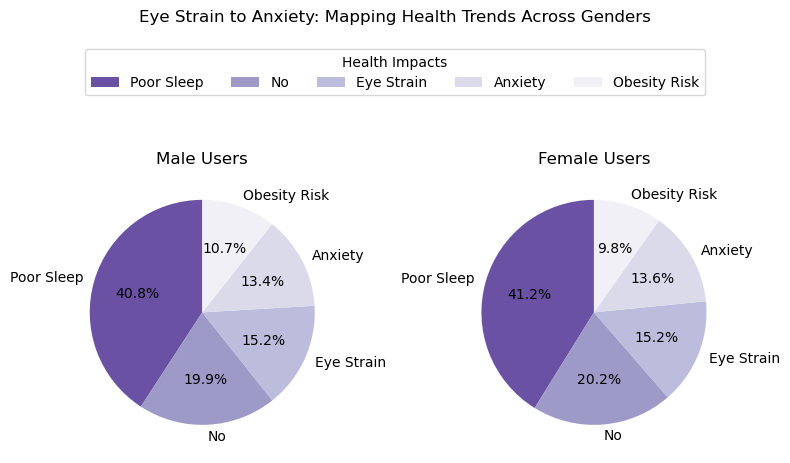

In [31]:
a = pd.crosstab(index=h_impact['Health_Impacts'], columns=h_impact['Gender']).reset_index()
a.sort_values(['Female'], ascending=False, inplace=True)
ur_melt = a.melt(id_vars='Health_Impacts',
                value_vars=['Female','Male'],
                var_name='Gender',
                value_name = 'Counts')
male_impact = ur_melt[ur_melt['Gender']=='Male']
female_impact = ur_melt[ur_melt['Gender']=='Female']
fig, axe = plt.subplots(1,2,figsize=(8,6))
axe[0].pie(male_impact['Counts'],labels=himpacts,autopct='%1.1f%%',startangle=90, colors=impact_colors)
axe[0].set_title("Male Users")
axe[1].pie(female_impact['Counts'],labels=himpacts,autopct='%1.1f%%',startangle=90, colors=impact_colors)
axe[1].set_title("Female Users")
plt.suptitle("Eye Strain to Anxiety: Mapping Health Trends Across Genders")
fig.legend(title='Health Impacts', labels=himpacts,loc='upper center', 
          bbox_to_anchor=(0.5, 0.925),
          ncol=5)
plt.tight_layout()
plt.show()

In [32]:
avg_scree_time_device = df.groupby(['Primary_Device','Gender'])[['Avg_Daily_Screen_Time_hr']].agg({'Avg_Daily_Screen_Time_hr':['min','max','mean','median']})
avg_scree_time_device.columns = ['_'.join(col) for col in avg_scree_time_device.columns]
avg_scree_time_device.reset_index()

,Primary_Device,Gender,Avg_Daily_Screen_Time_hr_min,Avg_Daily_Screen_Time_hr_max,Avg_Daily_Screen_Time_hr_mean,Avg_Daily_Screen_Time_hr_median
0,Laptop,Female,0.32,8.27,4.481066,4.540
1,Laptop,Male,0.94,7.81,4.435549,4.435
2,Smartphone,Female,0.00,13.89,4.332350,4.400
3,Smartphone,Male,0.00,12.40,4.442463,4.520
4,TV,Female,0.00,11.25,4.283465,4.410
5,TV,Male,0.00,12.80,4.291868,4.360
6,Tablet,Female,0.00,12.09,4.203407,4.230
7,Tablet,Male,0.00,11.97,4.247035,4.405


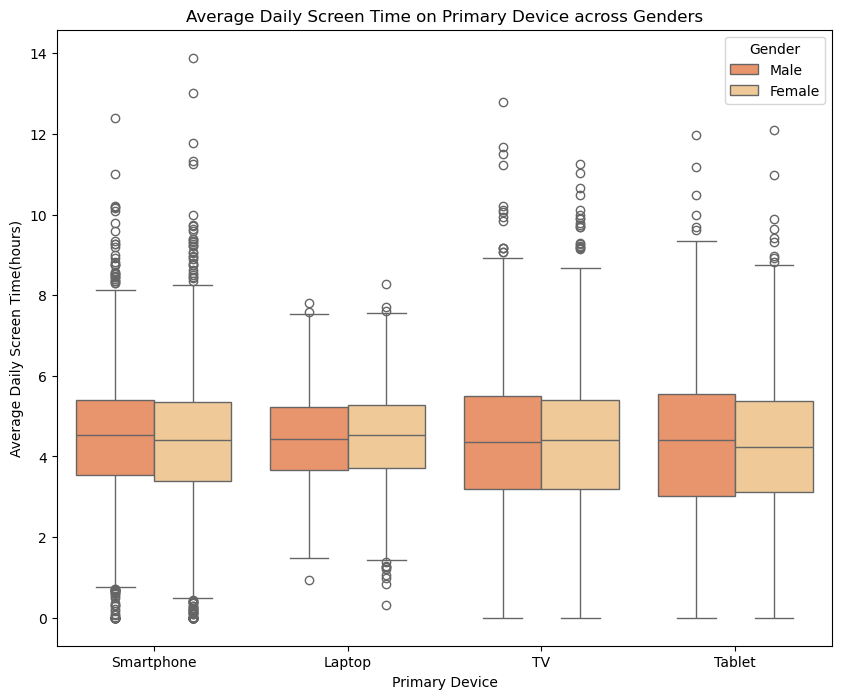

In [33]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df, x='Primary_Device', y='Avg_Daily_Screen_Time_hr', hue='Gender', palette=gender_colors)
plt.xlabel('Primary Device')
plt.ylabel('Average Daily Screen Time(hours)')
plt.title('Average Daily Screen Time on Primary Device across Genders', y=1)
plt.show()

In [34]:
avg_scree_time_device = df.groupby(['Urban_or_Rural','Gender'])[['Educational_to_Recreational_Ratio']].agg({'Educational_to_Recreational_Ratio':['mean','median']})
avg_scree_time_device.columns = ['_'.join(col) for col in avg_scree_time_device.columns]
avg_scree_time_device.reset_index()

,Urban_or_Rural,Gender,Educational_to_Recreational_Ratio_mean,Educational_to_Recreational_Ratio_median
0,Rural,Female,0.426709,0.43
1,Rural,Male,0.428987,0.43
2,Urban,Female,0.426687,0.42
3,Urban,Male,0.427221,0.43


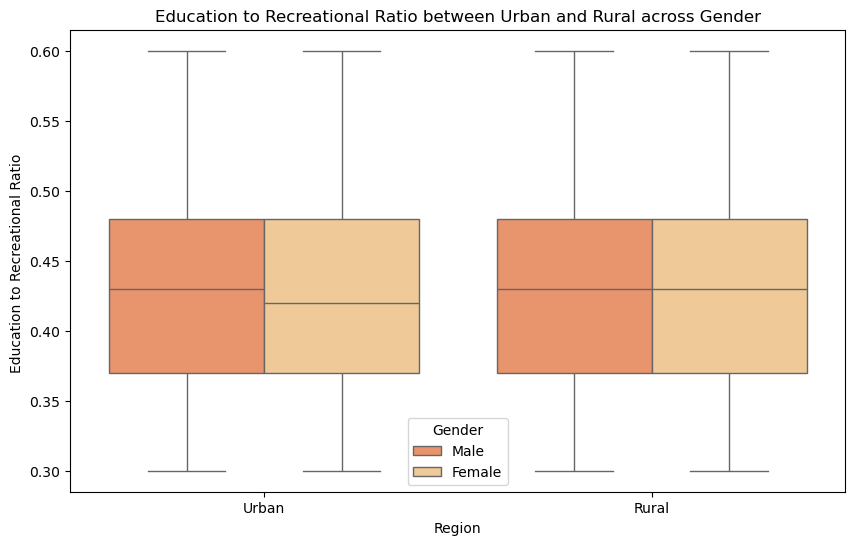

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, y='Educational_to_Recreational_Ratio', x='Urban_or_Rural', hue='Gender', palette=gender_colors)
plt.xlabel('Region')
plt.ylabel('Education to Recreational Ratio ')
plt.title('Education to Recreational Ratio between Urban and Rural across Gender')
plt.show()

In [36]:
age_bins= [7,10,13,16,20]
age_labels = ['8-10','11-13','14-16','17-18']
df['Age_Groups']= pd.cut(df['Age'], bins=age_bins, labels=age_labels)
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Age_Groups
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,14-16
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,11-13
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,17-18
3,15,Female,1.21,Laptop,False,0.39,No,Urban,14-16
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,11-13


In [37]:
df['Age_Groups'].value_counts()

Age_Groups
8-10     2674
11-13    2643
14-16    2636
17-18    1759
Name: count, dtype: int64

In [38]:
age_8_10 = df[df['Age_Groups']=='8-10']
age_11_13 = df[df['Age_Groups']=='11-13']
age_14_16 = df[df['Age_Groups']=='14-16']
age_17_18 = df[df['Age_Groups']=='17-18']

In [39]:
df.groupby(['Age_Groups']).agg({'Age':['min','max']})

Age    
           min max
Age_Groups        
8-10         8  10
11-13       11  13
14-16       14  16
17-18       17  18

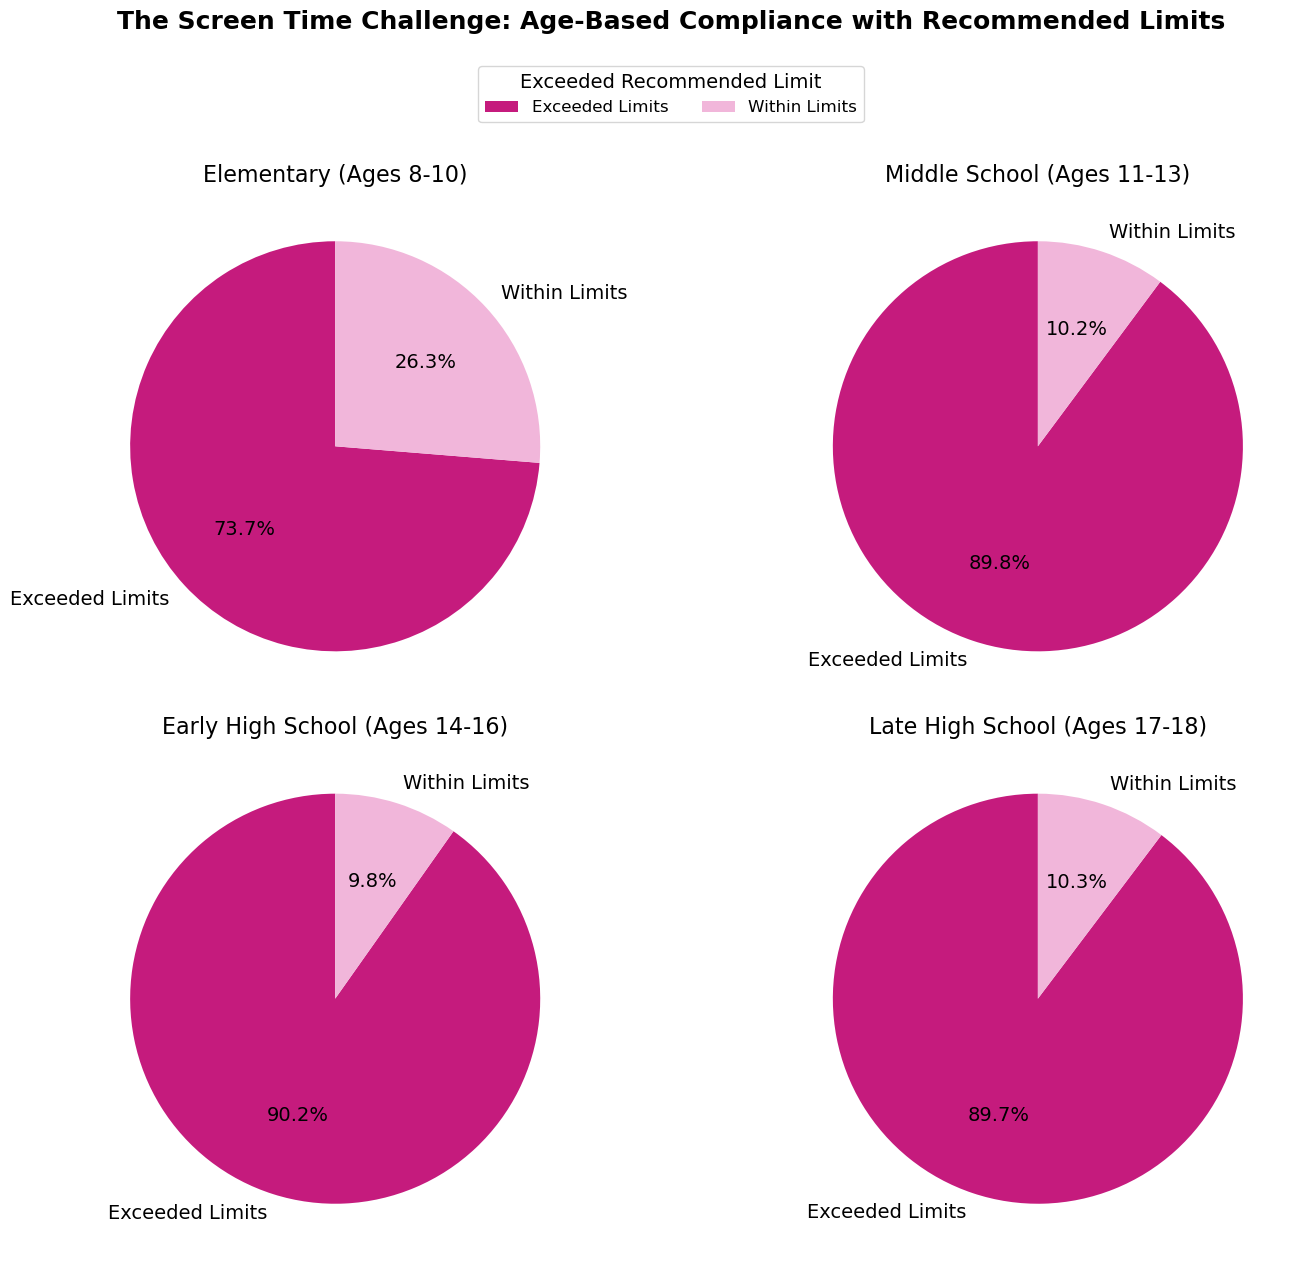

In [61]:
import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

ax1.pie(primary_device_8_10['count'], 
        labels=limitlabels, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=tf_colors, 
        textprops={'fontsize': 14}, 
        center=(0, 0), 
        radius=1)
ax1.set_title('Elementary (Ages 8-10)', fontsize=16)

ax2.pie(primary_device_11_13['count'], 
        labels=limitlabels, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=tf_colors, 
        textprops={'fontsize': 14}, 
        center=(0, 0), 
        radius=1)
ax2.set_title('Middle School (Ages 11-13)', fontsize=16)

ax3.pie(primary_device_14_16['count'], 
        labels=limitlabels, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=tf_colors, 
        textprops={'fontsize': 14}, 
        center=(0, 0), 
        radius=1)
ax3.set_title('Early High School (Ages 14-16)', fontsize=16)

ax4.pie(primary_device_17_18['count'], 
        labels=limitlabels, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=tf_colors, 
        textprops={'fontsize': 14}, 
        center=(0, 0), 
        radius=1)
ax4.set_title('Late High School (Ages 17-18)', fontsize=16)

fig.suptitle('The Screen Time Challenge: Age-Based Compliance with Recommended Limits', 
             fontsize=18, fontweight='bold', y=1.05)

fig.legend(title='Exceeded Recommended Limit', 
           labels=limitlabels, 
           loc='upper center', 
           bbox_to_anchor=(0.5, 1.01), 
           ncol=5, title_fontsize=14, fontsize=12)

plt.tight_layout()
plt.subplots_adjust(top=0.90)

plt.savefig("age_based_screen_time_compliance.png", dpi=300, bbox_inches='tight')

plt.show()



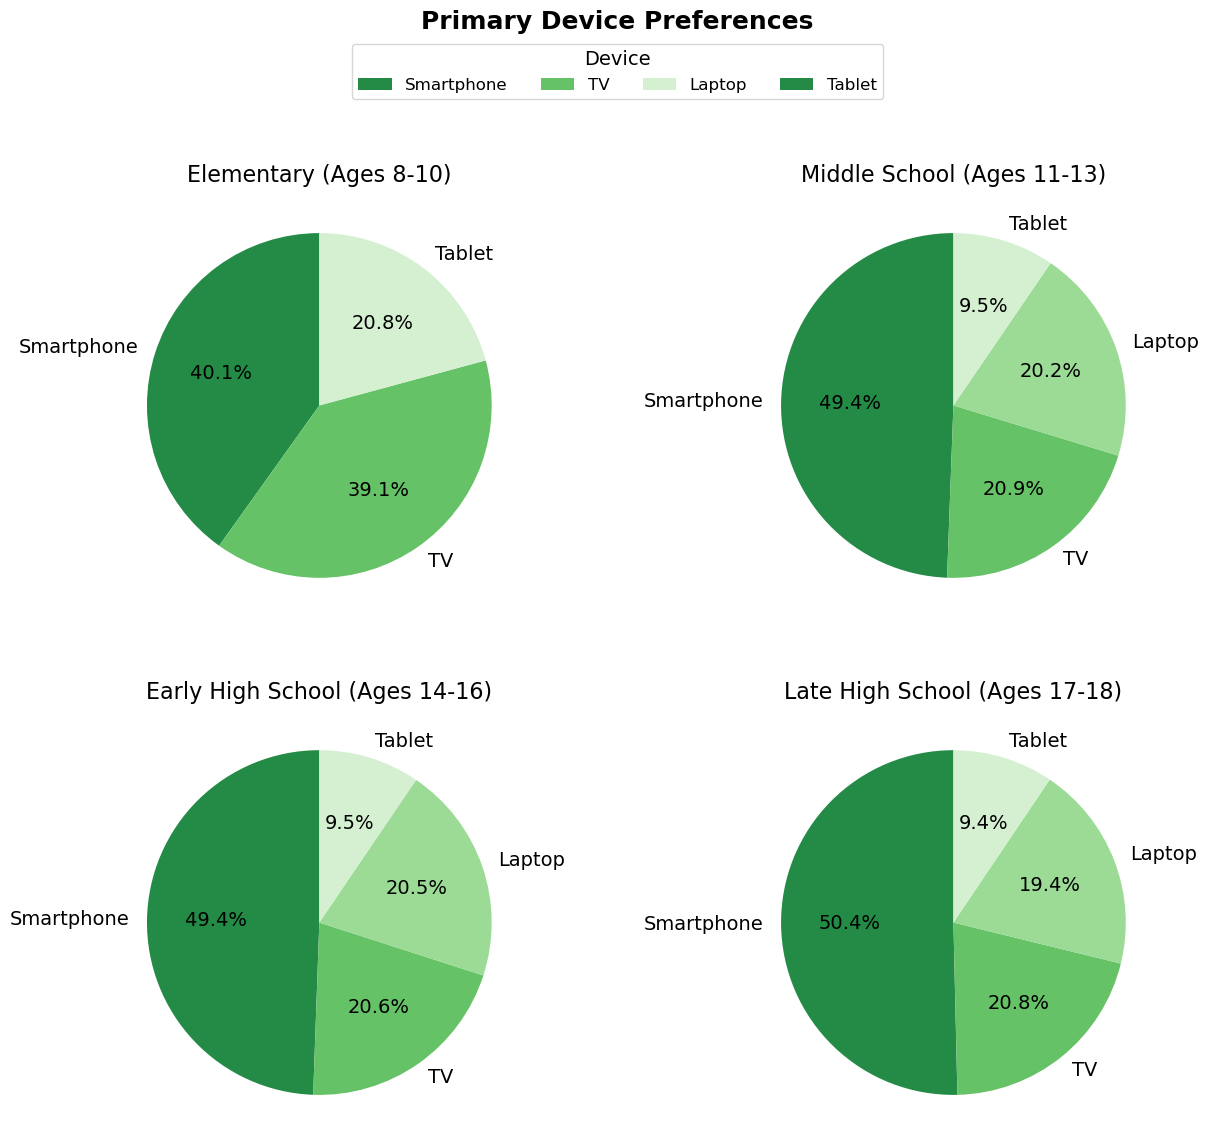

In [67]:
import matplotlib.pyplot as plt
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

ax1.pie(primary_device_8_10['count'], 
        labels=mlabels, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=dev_colors, 
        textprops={'fontsize': 14}, 
        center=(0, 0), 
        radius=1) 
ax1.set_title('Elementary (Ages 8-10)', fontsize=16)

ax2.pie(primary_device_11_13['count'], 
        labels=phonelabels, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=device_colors, 
        textprops={'fontsize': 14}, 
        center=(0, 0), 
        radius=1)  
ax2.set_title('Middle School (Ages 11-13)', fontsize=16)
ax3.pie(primary_device_14_16['count'], 
        labels=phonelabels, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=device_colors, 
        textprops={'fontsize': 14}, 
        center=(0, 0), 
        radius=1) 
ax3.set_title('Early High School (Ages 14-16)', fontsize=16)

ax4.pie(primary_device_17_18['count'], 
        labels=phonelabels, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=device_colors, 
        textprops={'fontsize': 14}, 
        center=(0, 0), 
        radius=1)
ax4.set_title('Late High School (Ages 17-18)', fontsize=16)
fig.suptitle('Primary Device Preferences', fontsize=18, fontweight='bold', y=1.05)
fig.legend(title='Device', 
           labels=phonelabels, 
           loc='upper center', 
           bbox_to_anchor=(0.5, 1.029), 
           ncol=5, 
           title_fontsize=14, 
           fontsize=12)

plt.subplots_adjust(top=0.90)

plt.savefig("primary_device_preferences.png", dpi=300, bbox_inches='tight')
plt.show()


In [42]:
df.groupby(['Primary_Device','Age_Groups']).agg({'Avg_Daily_Screen_Time_hr':['mean','median','min', 'max']})

Avg_Daily_Screen_Time_hr                    
                                              mean median   min    max
Primary_Device Age_Groups                                             
Laptop         8-10                            NaN    NaN   NaN    NaN
               11-13                      4.432627  4.460  0.32   7.81
               14-16                      4.428815  4.440  0.84   7.55
               17-18                      4.549853  4.670  1.06   8.27
Smartphone     8-10                       3.921901  3.740  0.00  13.89
               11-13                      4.537596  4.580  0.50   8.29
               14-16                      4.521197  4.530  0.16   8.74
               17-18                      4.540847  4.530  0.25   8.01
TV             8-10                       3.932201  3.860  0.00  12.80
               11-13                      4.573583  4.550  1.73   8.24
               14-16                      4.563499  4.590  0.65   8.67
               17-18                      4.477568  4.500  0.47   8.26
Tablet         8-10                       3.917680  4.005  0.00  12.09
               11-13                      4.478175  4.490  1.36   8.55
               14-16                      4.438520  4.460  0.48   8.03
               17-18                      4.555843  4.565  0.00   8.03

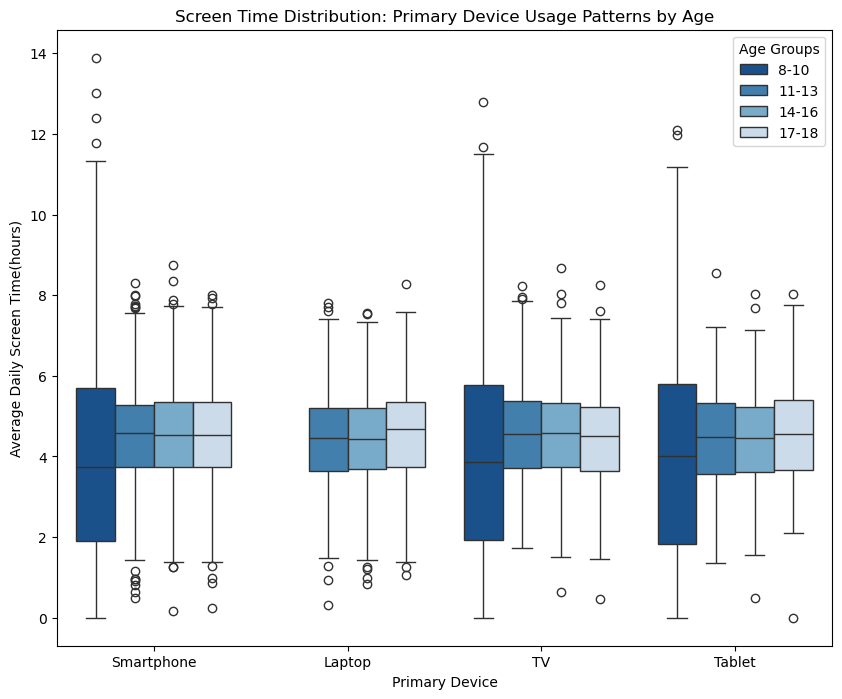

In [43]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df, x='Primary_Device', y='Avg_Daily_Screen_Time_hr', hue='Age_Groups', palette = age_colors)
plt.xlabel('Primary Device')
plt.ylabel('Average Daily Screen Time(hours)')
plt.legend(title='Age Groups')
plt.title('Screen Time Distribution: Primary Device Usage Patterns by Age', y=1)
plt.show()

In [44]:
df.groupby(['Age_Groups','Gender']).agg({'Avg_Daily_Screen_Time_hr':['mean','median','min','max']})

Avg_Daily_Screen_Time_hr                    
                                      mean median   min    max
Age_Groups Gender                                             
8-10       Female                 3.831884  3.700  0.00  13.89
           Male                   4.012538  3.940  0.00  12.80
11-13      Female                 4.513103  4.520  0.32   8.55
           Male                   4.521486  4.550  0.65   8.29
14-16      Female                 4.466393  4.450  0.16   8.74
           Male                   4.538475  4.585  1.25   8.03
17-18      Female                 4.577559  4.640  0.25   8.27
           Male                   4.486957  4.460  0.00   7.78

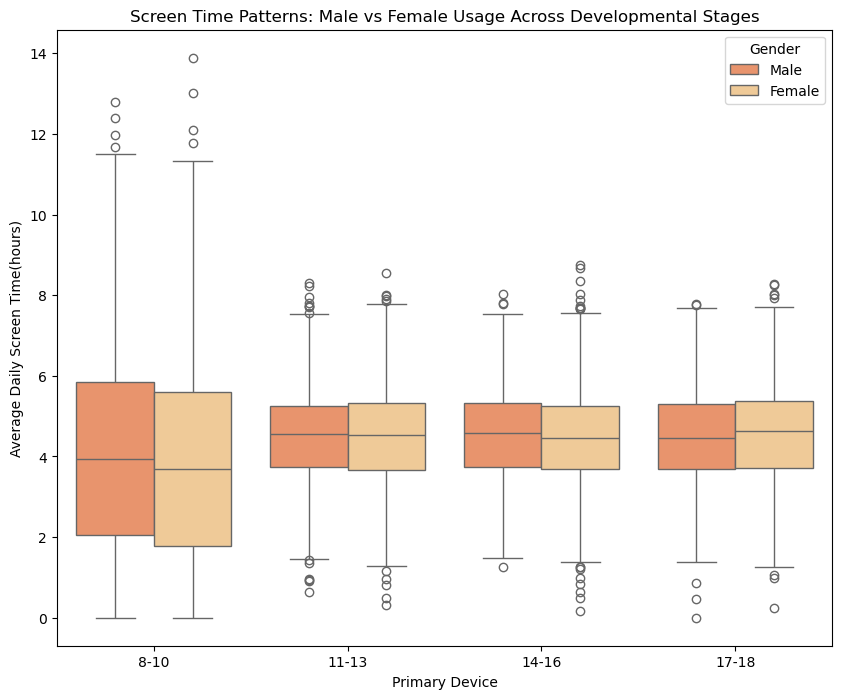

In [45]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df, x='Age_Groups', y='Avg_Daily_Screen_Time_hr', hue='Gender', palette=gender_colors)
plt.xlabel('Primary Device')
plt.ylabel('Average Daily Screen Time(hours)')
plt.title('Screen Time Patterns: Male vs Female Usage Across Developmental Stages', y=1)
plt.show()


In [46]:
df.groupby(['Age_Groups','Exceeded_Recommended_Limit']).agg({'Avg_Daily_Screen_Time_hr':['mean','median','min','max']})

Avg_Daily_Screen_Time_hr               \
                                                          mean median   min   
Age_Groups Exceeded_Recommended_Limit                                         
8-10       False                                      0.756984  0.660  0.00   
           True                                       5.055008  4.790  2.01   
11-13      False                                      2.398550  2.520  0.32   
           True                                       4.757338  4.690  3.01   
14-16      False                                      2.406589  2.515  0.16   
           True                                       4.730610  4.660  3.01   
17-18      False                                      2.395470  2.500  0.00   
           True                                       4.775773  4.710  3.01   

                                              
                                         max  
Age_Groups Exceeded_Recommended_Limit         
8-10       False                        2.00  
           True                        13.89  
11-13      False                        3.00  
           True                         8.55  
14-16      False                        3.00  
           True                         8.74  
17-18      False                        3.00  
           True                         8.27

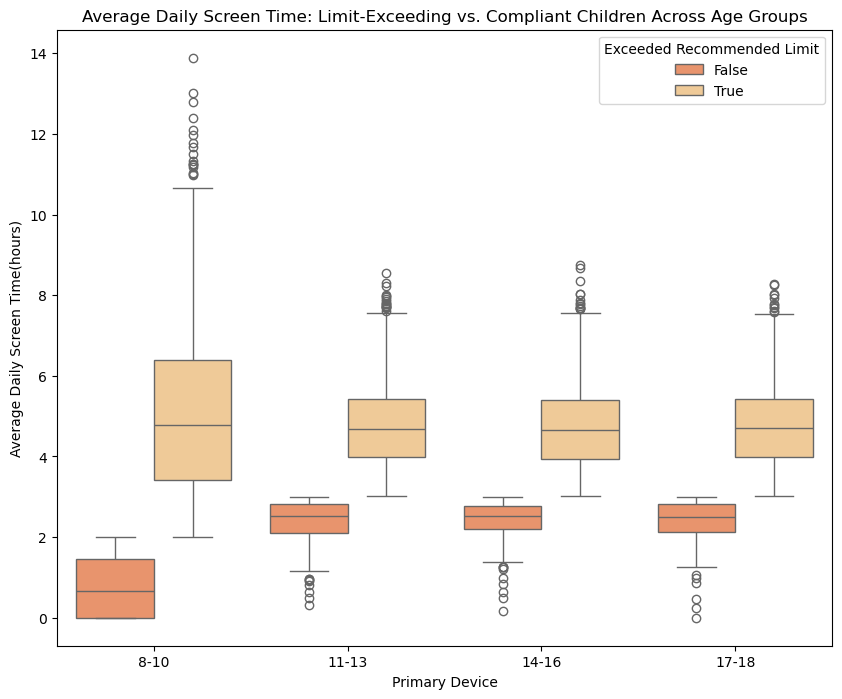

In [47]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df, x='Age_Groups', y='Avg_Daily_Screen_Time_hr', hue='Exceeded_Recommended_Limit', palette=gender_colors)
plt.xlabel('Primary Device')
plt.ylabel('Average Daily Screen Time(hours)')
plt.legend(title='Exceeded Recommended Limit')
plt.title('Average Daily Screen Time: Limit-Exceeding vs. Compliant Children Across Age Groups', y=1)
plt.show()


In [48]:
df.groupby(['Primary_Device','Exceeded_Recommended_Limit']).agg({'Avg_Daily_Screen_Time_hr':['mean','median','min','max']})

Avg_Daily_Screen_Time_hr         \
                                                              mean median   
Primary_Device Exceeded_Recommended_Limit                                   
Laptop         False                                      2.320000   2.43   
               True                                       4.724165   4.63   
Smartphone     False                                      1.664136   1.86   
               True                                       4.816032   4.70   
TV             False                                      1.312239   1.36   
               True                                       4.861448   4.72   
Tablet         False                                      1.326164   1.47   
               True                                       4.904194   4.74   

                                                        
                                            min    max  
Primary_Device Exceeded_Recommended_Limit               
Laptop         False                       0.32   3.00  
               True                        3.01   8.27  
Smartphone     False                       0.00   3.00  
               True                        2.01  13.89  
TV             False                       0.00   2.97  
               True                        2.01  12.80  
Tablet         False                       0.00   3.00  
               True                        2.03  12.09

In [49]:
df.groupby(['Age_Groups','Exceeded_Recommended_Limit']).agg({'Educational_to_Recreational_Ratio':['mean','median','min','max']})

Educational_to_Recreational_Ratio  \
                                                                   mean   
Age_Groups Exceeded_Recommended_Limit                                     
8-10       False                                               0.499147   
           True                                                0.501055   
11-13      False                                               0.402974   
           True                                                0.400657   
14-16      False                                               0.398488   
           True                                                0.399113   
17-18      False                                               0.400221   
           True                                                0.397237   

                                                        
                                      median  min  max  
Age_Groups Exceeded_Recommended_Limit                   
8-10       False                        0.50  0.4  0.6  
           True                         0.50  0.4  0.6  
11-13      False                        0.40  0.3  0.5  
           True                         0.40  0.3  0.5  
14-16      False                        0.40  0.3  0.5  
           True                         0.40  0.3  0.5  
17-18      False                        0.40  0.3  0.5  
           True                         0.39  0.3  0.5

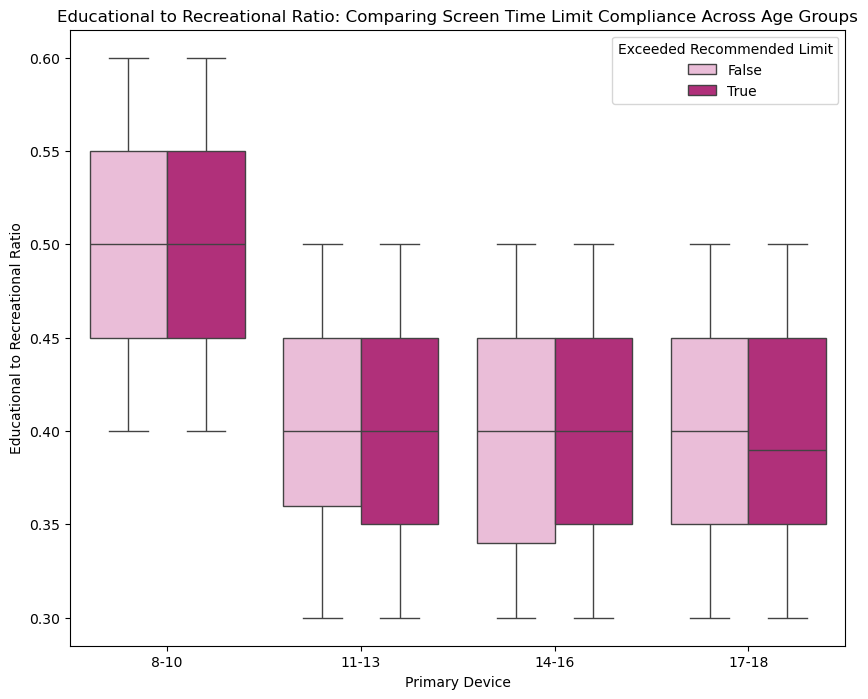

In [50]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df, x='Age_Groups', y='Educational_to_Recreational_Ratio', hue='Exceeded_Recommended_Limit', palette=ft_colors)
plt.xlabel('Primary Device')
plt.ylabel('Educational to Recreational Ratio')
plt.legend(title='Exceeded Recommended Limit')
plt.title('Educational to Recreational Ratio: Comparing Screen Time Limit Compliance Across Age Groups', y=1)
plt.show()


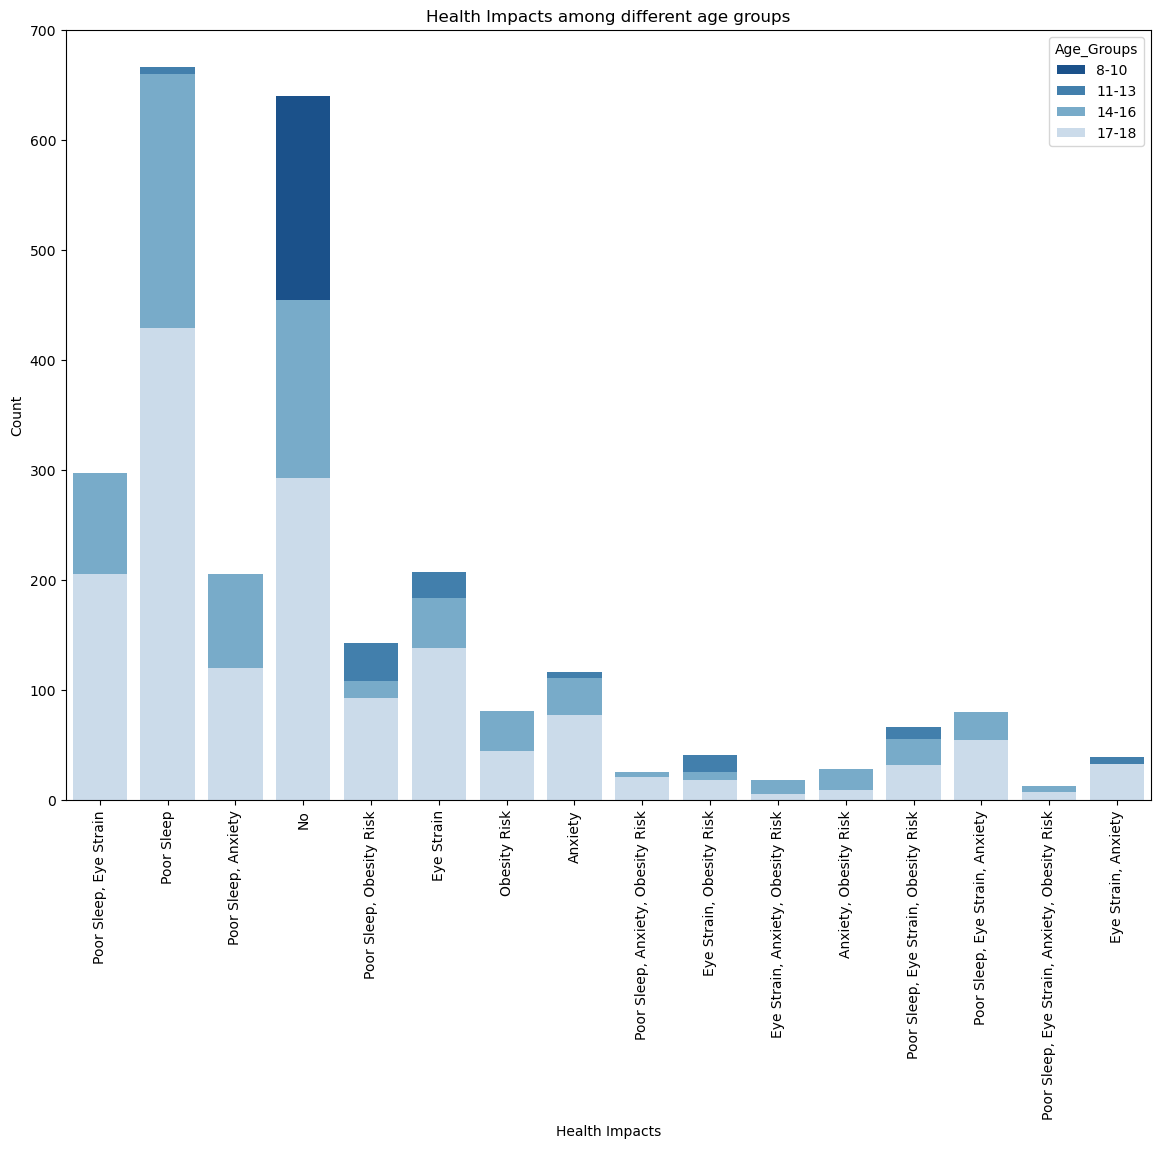

In [51]:
a=df[df['Exceeded_Recommended_Limit']==True]
plt.figure(figsize=(14,10))
sns.countplot(data=a, x='Health_Impacts', hue='Age_Groups', dodge=False, palette=age_colors)
plt.xlabel("Health Impacts")
plt.ylabel("Count")
plt.title("Health Impacts among different age groups")
plt.xticks(rotation=90)
plt.show()